# **Recitation 3 -Confidence Intervals and Random Number Generators**

In [1]:
# Things to import in general:  standard math/stats/plotting packages
import numpy as np
import scipy as sc
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk",font_scale=1.5, rc={"lines.linewidth": 2.5})

import math #to use math.sqrt, math.pi

# Different Types of Random Variable Generation

## Discrete

*   Binomial
*   Poisson:  "Probability of given number of events in a fixed interval of time (Wikipedia)" https://en.wikipedia.org/wiki/Poisson_distribution


## Continuous#

*   Exponential: "Describes the time between events..[when] events occur continuously and independently at a constant average rate (Wikipedia)"  https://en.wikipedia.org/wiki/Exponential_distribution
*   Log-normal:  "a random variable whose logarithm is normally distributed (Wikipedia)"  https://en.wikipedia.org/wiki/Log-normal_distribution
*   Triangular:  "based on a knowledge of the minimum and maximum and [a guess] as to the modal value...called a "lack of knowledge" distribution (Wikipedia)"  https://en.wikipedia.org/wiki/Triangular_distribution

Visit https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats for more options.




### Poisson:
pmf $f(k) = \frac{\mu^k e^{-\mu}}{k!}$, mean $\mu$, variance $\mu$.

(array([0.124, 0.266, 0.299, 0.161, 0.094, 0.038, 0.012, 0.003, 0.003]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

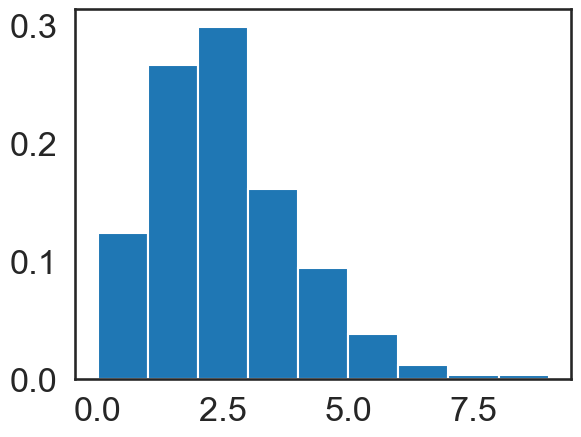

In [2]:
#poisson.rvs(mu, loc, size) - can set loc=0
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson
mu = 2
X = sc.stats.poisson.rvs(mu = mu, size = 1000)
plt.hist(X, bins = np.arange(10), density=True)

### Exponential:
pdf $f(x) = \frac{1}{\mu} e^{-x/\mu}$, mean $\mu$, variance $\mu^2$.

(array([0.06827569, 0.02874148, 0.01114466, 0.00504442, 0.00234624,
        0.00070387, 0.00082119, 0.00011731, 0.        , 0.00011731]),
 array([9.08412966e-03, 8.53334814e+00, 1.70576121e+01, 2.55818762e+01,
        3.41061402e+01, 4.26304042e+01, 5.11546682e+01, 5.96789322e+01,
        6.82031962e+01, 7.67274602e+01, 8.52517242e+01]),
 <a list of 10 Patch objects>)

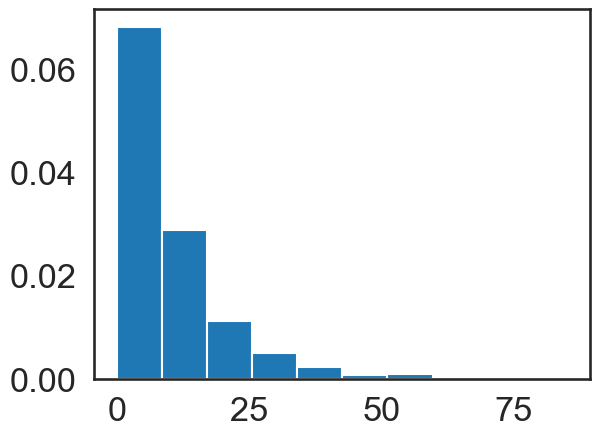

In [3]:
#expon.rvs(loc, scale, size) - can set loc = 0; scale is basically mu
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
mu = 10
X = sc.stats.expon.rvs(scale = mu, size = 1000)
plt.hist(X, density=True)

### Log-normal
$X$ is said to be log-normally distributed with mean  $m = e^{\mu + \frac{\sigma^2}{2}}$ and variance $ v =\left(e^{\sigma^2}-1 \right)e^{2\mu + \sigma^2} $,  if $\ln X$ is normally distributed with mean $\mu$ and variance $\sigma^2$.

The pdf of $X$ is given by $f(x) = \frac{1}{x \sigma \sqrt{2 \pi}} e^{-\frac{(ln \; x - \mu)^2}{2 \sigma^2}}$.

Alternatively, given the mean $m$ and variance $v$ of a log-normal distribution, we can compute $\mu$ and $\sigma$, parameters of the corresponding normal distribution as:
\begin{align*}
\mu &= \ln \left( \frac{m}{\sqrt{1+\frac{v}{m^2}}} \right), \\
\sigma^2 & = \ln \left( 1+ \frac{v}{m^2} \right).
\end{align*}

-0.01842480123380444
1.065167195094414


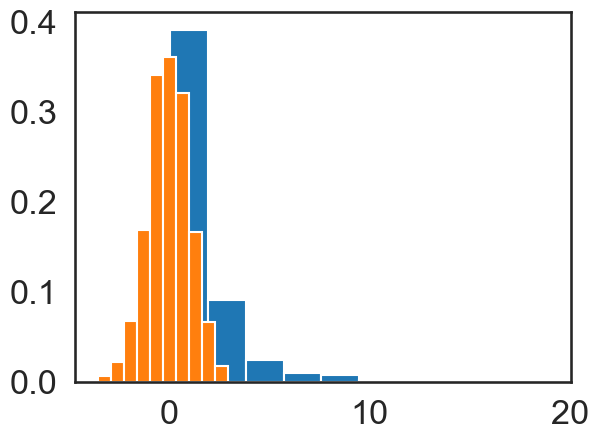

In [15]:
#lognorm.rvs(s, loc, scale, size) - can set loc =0; s is \sigma, scale is e^\mu
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm
mu = 0
sigma = 1
X = sc.stats.lognorm.rvs(s = sigma, loc = 0, scale = np.exp(mu), size = 1000)
plt.hist(X, density=True)
plt.hist(np.log(X), density=True)
print(np.mean(np.log(X)))
print(np.var(np.log(X)))


### Triangular

pdf 
\begin{align*}
f(x) = \cases{
0 &: $x<\alpha$ \\
\frac{2(x-\alpha)}{(\beta-\alpha)(\gamma-\alpha)} &:$ \alpha \leq x \leq \gamma$ \\
\frac{2}{\beta-\alpha} &: $x= \gamma $\\
\frac{2(\beta-x)}{(\beta-\alpha)(\beta-\gamma)} &:$ \gamma \leq x \leq \beta $\\
0 &: $x \geq \beta$
}
\end{align*}
where $\alpha, \beta$ are the minimum and maximum of the support and $\gamma$ is the mode.  




(array([0.05619233, 0.14644062, 0.2469057 , 0.34055958, 0.28436725,
        0.23839171, 0.17709098, 0.11408746, 0.0800315 , 0.01873078]),
 array([1.10739877, 1.69466752, 2.28193626, 2.86920501, 3.45647376,
        4.04374251, 4.63101125, 5.21828   , 5.80554875, 6.3928175 ,
        6.98008624]),
 <a list of 10 Patch objects>)

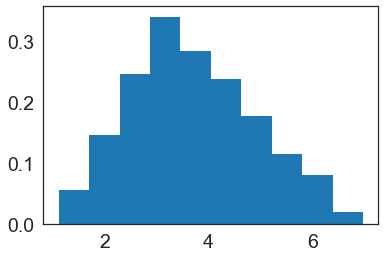

In [5]:
#triang.rvs(c, loc, scale, size)
#The pdf slopes up from loc to loc+c, then down from loc+c to loc+scale.
#So given \alpha, \beta, and \gamma, we have loc = \alpha, loc+scale = \beta, and loc+c*scale = \gamma
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang
alpha=1
beta=7
gamma=3
#solving above equations
loc = alpha
scale = beta-loc
c = (gamma-loc)/(beta-loc)
X = sc.stats.triang.rvs(c, loc, scale, size=1000)
plt.hist(X, density=True)

# Question 1

Nuts & Bolts Co. makes two types of assembly parts. The diameter of a nut it manufactures ($D_{nut}$) follows a lognormal distribution with mean 6.5mm and standard deviation 1mm. The diameter of a bolt ($D_{bolt}$) follows a triangular distribution with min, max, and most likely values 3, 6, and 5mm, respectively.

## Part a

Use 2,500 replications to estimate the clearance between nut and bolt: $\mathbb{E}[D_{nut}-D_{bolt}]$.  Find a 99% confidence interval for the the estimated clearance.





## Part b
Use the resulting histogram to estimate the value $d$ such that 
$\mathbb{P}[0<D_{nut}-D_{bolt}\leq d]=0.90$.



---



# Question 2

Suppose  you  are  asked  to  determine  the  registration  fee  for  an  academic  conference.  The number  of  people  who  will  register  for  this  conference  follows  a  Poisson  distribution  with  rate parameter  $\lambda = 250$  (as  long  as  the  registration  fee  is  less  than  600).  

The  cost  of  running the  conference can  be  divided  into  two  parts:  fixed  cost  and  variable  cost.  The  fixed  cost  includes  room rental  ($\$6000$),  speaker  honorarium  ($\$5000$),  meeting  management  ($\$5000$)  and  marketing ($\$7000$).  The  variable  cost  includes  registration  cost  (printing,  name  tag  etc,  which  is  $\$80$ per  person)  as  well  as  food  and  beverage  cost  (which  is  normally  distributed  with  mean $\$100$ per  person  and  variance  100).  Assume  that  a  single  food  and  beverage  cost  is  applied  to all  attendees.  What  is  the  minimum  registration  fee  such  that  the  probability  of  making  a profit  is  at  least  95%?



---



# Question 3
First: Review of LCG

Given the LCG $X_{n+1}=  (a X_n+c)  \mod m$,  with $m=  1000,a=  31,c=  3$, we want to generate  samples  of (pseudo-)random  numbers:

### Part a ###
Generate  512  uniform  random  numbers  $(U_1,\ldots,  U_{512})$  with  this  LCG,  starting  with  the seed $x_0=  0$.  Plot  the  points  $(U_1,  U_2),(U_3,  U_4),\ldots ,(U_{511},  U_{512})$

### Part b ###
Suppose  that  we  wish  to  estimate  the  probability  that  $U \sim U(0,1)$ takes value greater than 0.7.  The  true  probability  is $0.3$, but what happens if we estimate this probability by generating our pseudo-random variables via our LCG?   

Use  this  LCG  to  generate  a sequence  of  pseudo-random numbers on $U(0,  1)$ starting  with  the seed $x_0=  0$.  If you ran this non-full period LCG for a very long time, what is the limit of the estimate of $\mathbb{P}[U > 0.7]$,  obtained  from  the  $n$ pseudo-random numbers as $n\rightarrow \infty$? 



---



# Question 4


As we discussed in class, in order to avoid biases, simulations should not use anywhere near the full period of an LCG. This creates a problem for some large simulations, which need a lot of random variables. For example, a common LCG implementation uses $m = 2^{31} − 1$, which is insufficient for traffic simulators with tens of thousands of vehicles, thousands of random disturbances and lots of replications. We will now see a method to combine multiple LCGs to obtain a generator with a longer
period. The main idea for increasing the period of an LCG is to add a smaller period LCG to it. For example, suppose we have two MGs, $X_{n+1} = (a_1 X_n ) \text{ mod } m_1$ and $Y_{n+1} = (a_2 Y_n ) \text{ mod } m_2$ , with $m_1 > m_2$. We can derive a combined generator by setting $Z_n = (X_n + Y_n ) \text{ mod } m_1$ . If properly designed, the resulting period can be on the order of $m_1 m_2$. We will now see a small example to see how this works.

In [6]:
# Functions to visualize LCG sequence on clock
def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')

# plot_clock_path takes as an argument the uniform random variable, NOT the x sequence!
def plot_clock_path(m,u,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(u[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')
    
    # Plot the path of the LCG sequence
    for i in range(len(u)-1):
        theta_start = 2.0*np.pi*(u[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(u[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y, 
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)

### Part a

Consider two LCGs, $x_{n+1} = (5x_n ) \text{ mod } 16$ and $y_{n+1} = (2x_n ) \text{ mod } 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n ,y_n$ using the clock visualization introduced in class (one separate plot for each sequence). You can use the code in ${\tt clockpath.ipynb}$ (feel free to modify it if required) or write your own visualization.

What is the period of each sequence?


### Part b 
Next, define a combined LCG as $z_{n} = (x_n +y_n ) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization.

What is the period of this new sequence?